# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [33]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd



In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | BA created a new low-cost s...
1,✅ Trip Verified | I flew with British Airway...
2,✅ Trip Verified | Manchester to Copenhagen vi...
3,✅ Trip Verified | I have never seen such disr...
4,✅ Trip Verified | Paid for a 14 hour long fli...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Checking DataFrame Null & duplicated values

In [6]:
# Checking DataFrame infos and null rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [7]:
# Checking basic statistics of the "reviews" column
df['reviews'].describe()

count                                                  1000
unique                                                 1000
top       ✅ Trip Verified |  BA created a new low-cost s...
freq                                                      1
Name: reviews, dtype: object

In [8]:
# Checking for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
# Counting the number of reviews
review_count = df['reviews'].count()
print("Total number of reviews:", review_count)

Total number of reviews: 1000


# Cleaning reviews | Remove Prefix

In [20]:
# Finding the length of each review
df['review_length'] = df['reviews'].str.len()
df.head()

,reviews,review_length
0,BA created a new low-cost subsidiary in BA Eu...,2600
1,✅ Trip Verified | I flew with British Airway...,1460
2,Manchester to Copenhagen via London on 30th A...,1240
3,I have never seen such disrespect to a custom...,512
4,Paid for a 14 hour long flight ticket which i...,1291


In [21]:
# Remove '✅ Trip Verified | '
def remove_prefix(review):
    prefix = '✅ Trip Verified | '
    if review.startswith(prefix):
        return review[len(prefix):]
    else:
        return review

# Applying the function to the "reviews" column
df['reviews'] = df['reviews'].apply(remove_prefix)

# Displaying the dataframe with the prefix removed
print(df)

                                               reviews  review_length
0     BA created a new low-cost subsidiary in BA Eu...           2600
1    ✅ Trip Verified |   I flew with British Airway...           1460
2     Manchester to Copenhagen via London on 30th A...           1240
3     I have never seen such disrespect to a custom...            512
4     Paid for a 14 hour long flight ticket which i...           1291
..                                                 ...            ...
995   Vancouver to London, we were upgraded to busi...            208
996   \r\nMiami to London Heathrow with British Air...            341
997   Houston to London. The plane left an hour lat...            629
998   London to Delhi. The worst business class tri...            799
999   Bucharest to London. My flight with British A...           1343

[1000 rows x 2 columns]


# Performing sentiment analysis on reviews

In [34]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   ---------- ----------------------------- 163.8/626.3 kB 1.2 MB/s eta 0:00:01
   --------------------- ------------------ 337.9/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
from textblob import TextBlob

df['sentiment_polarity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [36]:
# Filtering reviews based on certain criteria
positive_reviews = df[df['sentiment_polarity'] > 0]
positive_reviews

,reviews,review_length,sentiment_polarity,sentiment_subjectivity
0,BA created a new low-cost subsidiary in BA Eu...,2600,0.072402,0.531707
1,✅ Trip Verified | I flew with British Airway...,1460,0.026961,0.369118
4,Paid for a 14 hour long flight ticket which i...,1291,0.040000,0.403333
8,We chose Rotterdam and London City airport be...,903,0.078125,0.487500
11,I wanted to write this review so I could give ...,740,0.126389,0.316667
...,...,...,...,...
994,"London to Calgary. Thank you to James, a Club...",184,0.570000,0.750000
995,"Vancouver to London, we were upgraded to busi...",208,0.525000,0.675000
996,\r\nMiami to London Heathrow with British Air...,341,0.365067,0.498064
997,Houston to London. The plane left an hour lat...,629,0.062500,0.361111


In [37]:
positive_reviews = df[df['sentiment_polarity'] > 0.5]
positive_reviews.count()

reviews                   25
review_length             25
sentiment_polarity        25
sentiment_subjectivity    25
dtype: int64

In [38]:
# Filtering reviews based on certain criteria
negative_reviews = df[df['sentiment_polarity'] < 0]
negative_reviews

,reviews,review_length,sentiment_polarity,sentiment_subjectivity
2,Manchester to Copenhagen via London on 30th A...,1240,-0.079493,0.537899
3,I have never seen such disrespect to a custom...,512,-0.150000,0.314286
5,Very inconsiderate PA announcements were made...,1839,-0.000566,0.472227
6,"Absolutely terrible, lost my luggage on both ...",335,-0.593750,0.666667
7,We booked premium economy round trip from Pho...,3074,-0.041747,0.402496
...,...,...,...,...
972,Inverness to Auckland via Singapore with Briti...,295,-0.047222,0.499843
984,I paid an extra £500 for two Premium economy ...,554,-0.069333,0.491667
990,London to Shanghai. The most disappointing bu...,1039,-0.072601,0.546843
993,I booked a flight from Bucharest to London an...,488,-0.188889,0.422222


In [39]:
# Filtering reviews based on certain criteria
negative_reviews = df[df['sentiment_polarity'] < 0.5]
negative_reviews.count()

reviews                   975
review_length             975
sentiment_polarity        975
sentiment_subjectivity    975
dtype: int64

# Pie Chart Visualization

In [43]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['sentiment_polarity'].apply(vader_analysis)
df.head()

,reviews,review_length,sentiment_polarity,sentiment_subjectivity,Analysis
0,BA created a new low-cost subsidiary in BA Eu...,2600,0.072402,0.531707,Neutral
1,✅ Trip Verified | I flew with British Airway...,1460,0.026961,0.369118,Neutral
2,Manchester to Copenhagen via London on 30th A...,1240,-0.079493,0.537899,Negative
3,I have never seen such disrespect to a custom...,512,-0.150000,0.314286,Negative
4,Paid for a 14 hour long flight ticket which i...,1291,0.040000,0.403333,Neutral


In [44]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Neutral     615
Negative    360
Positive     25
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17e62efa690>,
 [Text(-0.3888223589862546, 1.0289884222635182, 'Neutral'),
  Text(0.3068903274112648, -1.0563230220635196, 'Negative'),
  Text(1.3458384165307498, -0.10591957604713309, 'Positive')],
 [Text(-0.2120849230834116, 0.5612664121437371, '61.5%'),
  Text(0.16739472404250805, -0.5761761938528288, '36.0%'),
  Text(0.8473797437415831, -0.06669010343708379, '2.5%')])

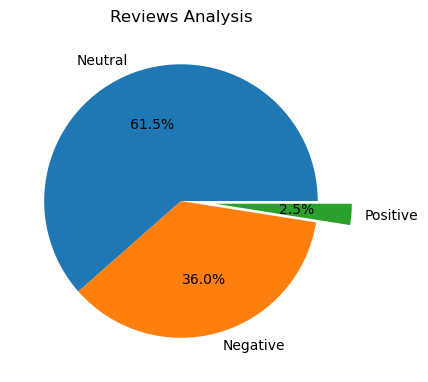

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Scatter plot Visualization

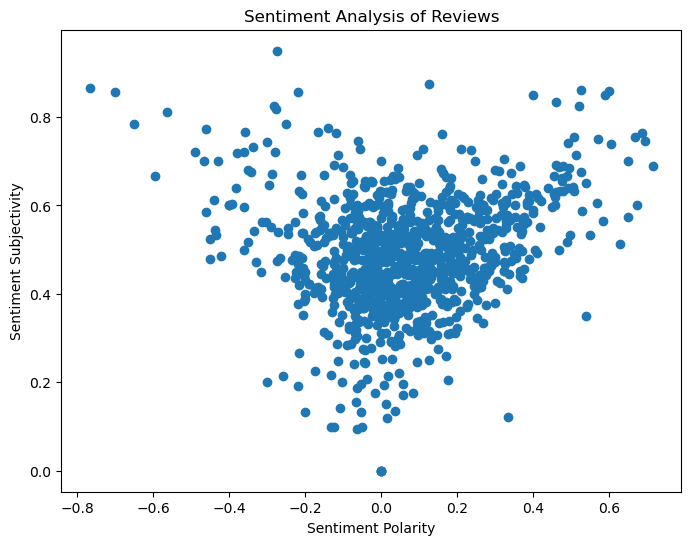

In [46]:
import matplotlib.pyplot as plt
import pandas as pd


# Creating a scatter plot for sentiment polarity and subjectivity
plt.figure(figsize=(8, 6))
plt.scatter(df['sentiment_polarity'], df['sentiment_subjectivity'])
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Reviews')
plt.show()

## The scatter plot helps visualize the distribution of sentiment polarity and subjectivity in the reviews.

-Positive sentiment polarity values will be towards the right.

-Negative sentiment polarity values towards the left

-Higher sentiment subjectivity values towards the top (focuses on a personal interpretation not facts)

-If subjectivity < 0.5, the sentence is more subjective than objective and vice versa.


## We can conclude that there are:

-666 reviews with a positive sentiment but only 21 reviews with a sentiment polarity above 0.5

-326 reviews with a negative sentiment

-Looking at the sentiment analysis of reviews we can see that most of the reviews are in the middle which makes it hard to determine if they are + or _

# Wordclouds Visualization


In [53]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 737.3 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


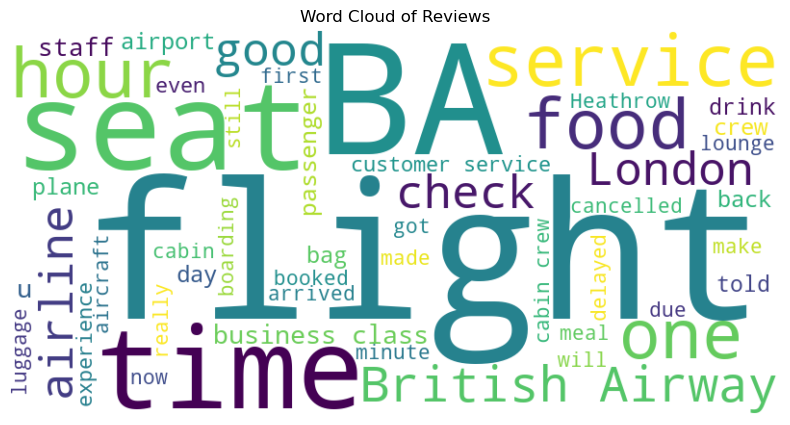

In [54]:
from wordcloud import WordCloud

# Concatenate all the reviews into a single string
reviews_text = ' '.join(df['reviews'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

The worldcloud shows word that need to be removed because they do not help in categorising reviews into a good or bad review.

## Use stopwords to remove typical english words

In [56]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

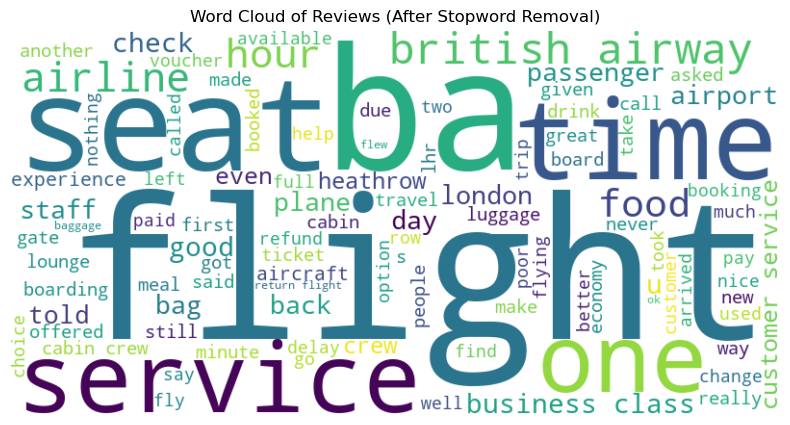

In [57]:
from nltk.corpus import stopwords

# Tokenize the text into individual words
words = reviews_text.split()

# Convert the words to lowercase
words = [word.lower() for word in words]

# Load the stop words from NLTK
stop_words = set(stopwords.words('english'))

# Filter out the stop words
words = [word for word in words if word not in stop_words]

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews (After Stopword Removal)')
plt.show()

In [58]:
# Create a dictionary to store the word frequencies
word_freq = {}
for word in words:
    if word not in word_freq:
        word_freq[word] = 0
    word_freq[word] += 1

# Convert the word frequencies dictionary to a dataframe
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the words by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
print(word_freq_df.head(20))

          Word  Frequency
86      flight       1495
0           ba       1041
15     service        548
205    british        427
54         one        406
136       crew        398
64        food        389
1008  business        380
24           -        378
237      would        373
7       london        373
485        get        367
414       time        362
44        seat        360
228      staff        354
167         us        342
1009     class        341
135      cabin        332
366       good        319
206    airways        313


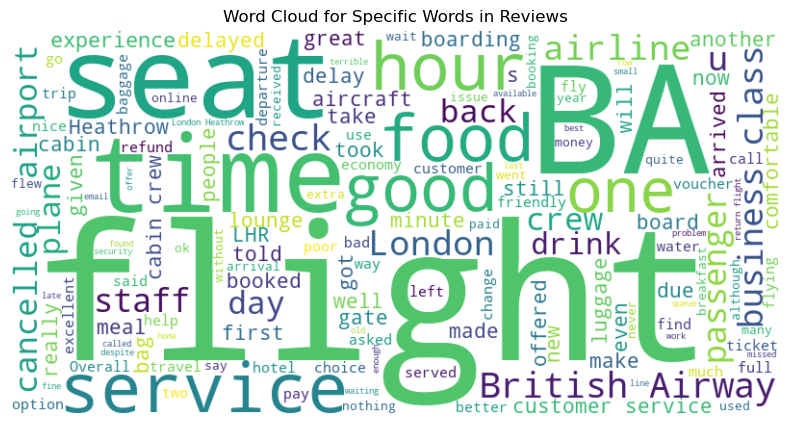

In [59]:
# List of words to create word cloud for
words_to_include = ['enjoy', 'nice', 'love', 'beautiful', 'excellent', 'beautiful', 'good', 'relaxing', 'amazing', 'comfortable','uncomfortable', 'dissapointing','bad','delay','delayed','cancelled','terrible','missing']

# Filter the reviews to only include those that contain the words of interest
reviews_filtered = df[df['reviews'].str.contains('|'.join(words_to_include), case=False)]

# Concatenate the filtered reviews into a single string
reviews_text = ' '.join(reviews_filtered['reviews'])

# Create a WordCloud object with desired parameters
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Specific Words in Reviews')
plt.show()

## Extracte Keywords from reviews

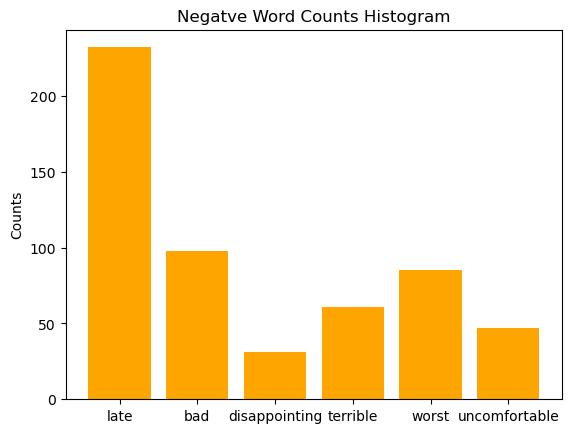

In [60]:
# Extracting negative keyword from reviews
import re

df['late'] = df['reviews'].str.extract(r'(late)', flags=re.IGNORECASE)
late_count = df['late'].count()

df['bad'] = df['reviews'].str.extract(r'(bad)', flags=re.IGNORECASE)
bad_count = df['bad'].count()

df['disappointing'] = df['reviews'].str.extract(r'(disappointing)', flags=re.IGNORECASE)
disappointing_count = df['disappointing'].count()

df['worst'] = df['reviews'].str.extract(r'(worst)', flags=re.IGNORECASE)
worst_count = df['worst'].count()

df['terrible'] = df['reviews'].str.extract(r'(terrible)', flags=re.IGNORECASE)
terrible_count = df['terrible'].count()

df['uncomfortable'] = df['reviews'].str.extract(r'(uncomfortable)', flags=re.IGNORECASE)
uncomfortable_count = df['uncomfortable'].count()

bad_words = ['late','bad','disappointing','terrible','worst','uncomfortable']
count_list = [late_count, bad_count, disappointing_count,terrible_count, worst_count, uncomfortable_count]

plt.bar(bad_words, count_list, color="orange")
plt.ylabel('Counts')
plt.title('Negatve Word Counts Histogram')
plt.show()

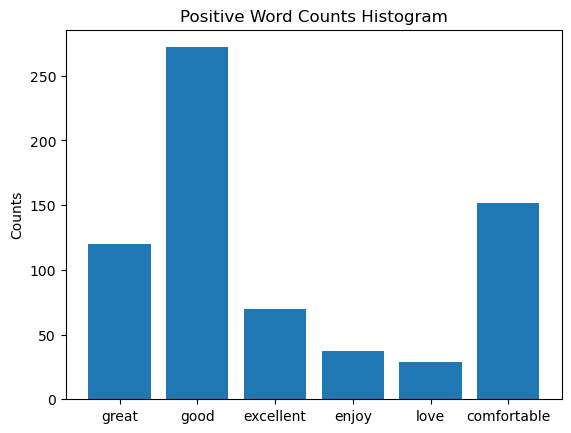

In [61]:
# Extracting positive keyword from reviews
df['great'] = df['reviews'].str.extract(r'(great)', flags=re.IGNORECASE)
great_count = df['great'].count()

df['good'] = df['reviews'].str.extract(r'(good)', flags=re.IGNORECASE)
good_count = df['good'].count()

df['excellent'] = df['reviews'].str.extract(r'(excellent)', flags=re.IGNORECASE)
excellent_count = df['excellent'].count()

df['enjoy'] = df['reviews'].str.extract(r'(enjoy)', flags=re.IGNORECASE)
enjoy_count = df['enjoy'].count()

df['love'] = df['reviews'].str.extract(r'(love)', flags=re.IGNORECASE)
love_count = df['love'].count()

df['comfortable'] = df['reviews'].str.extract(r'(comfortable)', flags=re.IGNORECASE)
comfortable_count = df['comfortable'].count()

good_words = ['great','good','excellent','enjoy','love','comfortable']
count_list2 = [great_count, good_count, excellent_count, enjoy_count, love_count, comfortable_count]

plt.bar(good_words, count_list2)
plt.ylabel('Counts')
plt.title('Positive Word Counts Histogram')
plt.show()